**TOPIC: Study the relationship between social media platforms and music tastes**<br>
**Questions**<br>
**1. What data do you have?**<br>
We have data of the age, gender, daily music consumption, preferred social media platform, music genre, occasion, and preferred music platform of our participants.
<br><br>
**2. What would you like to know?**<br>
Is there a correlation between certain social media platforms and music genres? Among those who do a certain chore, what are their favorite music genres and music platform? Can social media platforms be used to predict daily music consumption?
<br><br>
**3. Explore the data.**<br>
Generate statistics and perform visualizations. Explain what you are computing (mean, SD, ...), and then
compute using Python. Create some visualizations (at least 8, and at least 6
must be of different types); use Python.<br><br>
**4. Can you state any hypotheses or make predictions? Which tests can you apply to
verify your hypothesis? State clearly each of your hypotheses (at least 3).**<br>
We believe social media platforms have influence on music genre. We think age influences music consumption with a negative correlation. We believe gender influences music genre. We can use the correlation test to determine correlation between variables and see how related they are for predicting each other.<br><br>
**5. Test your hypotheses.**<br>
Test your hypotheses and predictions (use at least 2 different
tests). For each: i) describe the test you are using; ii) perform it; iii) analyze
the results and draw the conclusion. You must perform correlation analysis and chi-squared test.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2
df = pd.read_csv("Responses.csv")

In [2]:
df = df[['1. How old are you?',
         "2. To which gender identity do you most identify?",
         '62. On average, how many hours do you listen to music per day?', 
         '68. Which social media platforms do you use most often?', 
         '69. What is your favorite genre of music?', 
         '70. In which of the following situations do you listen to music?', 
         '71. Which music streaming service do you use the most?']]
df = df.rename(columns={'1. How old are you?': 'Age', 
                        '2. To which gender identity do you most identify?': 'Gender', 
                        '62. On average, how many hours do you listen to music per day?': 'Daily_Music_Consumption', 
                        '68. Which social media platforms do you use most often?': 'Preferred_Social_Medias', 
                        '69. What is your favorite genre of music?': 'Music_Genre', 
                        '70. In which of the following situations do you listen to music?': 'Occasion', 
                        '71. Which music streaming service do you use the most?': 'Preferred_Music_Platform'})
df.loc[~df['Gender'].isin(['Man', 'Woman']), 'Gender'] = 'Other'
df.loc[df['Music_Genre'] == "Breakcore", 'Music_Genre'] = "Electronic"
df.loc[df['Music_Genre'] == "Bladee", 'Music_Genre'] = "Hip Hop / Rap"
df.loc[df['Music_Genre'] == "Funk", 'Music_Genre'] = "Pop"
df.loc[df['Music_Genre'] == "House", 'Music_Genre'] = "Electronic"
df.loc[df['Music_Genre'] == "I have no favorite", 'Music_Genre'] = "No preference"
df.loc[df['Music_Genre'] == "Lofi", 'Music_Genre'] = "Other"

In [3]:
df.loc[df['Music_Genre'] == "Most genres like anime, jpop, edm, hip hop, kpop, pop, r&b, lofi", 'Music_Genre'] = "Anime / Jpop"
df.loc[df['Music_Genre'] == "Musical Theater", 'Music_Genre'] = "Other"
df.loc[df['Music_Genre'] == "Phonk", 'Music_Genre'] = "Electronic"
df.loc[df['Music_Genre'] == "Salsa music", 'Music_Genre'] = "Other"
df.loc[df['Music_Genre'] == "Soundtrack ", 'Music_Genre'] = "Other"
df.loc[df['Music_Genre'] == "Video Game", 'Music_Genre'] = "Other"
df.loc[df['Music_Genre'] == "any, whatever sounds good to my ear", 'Music_Genre'] = "No preference"
df.loc[df['Music_Genre'] == "electronic pop ", 'Music_Genre'] = "Electronic"
df.loc[df['Music_Genre'] == "idk", 'Music_Genre'] = "No preference"
df.loc[df['Music_Genre'] == "indie pop", 'Music_Genre'] = "Indie / Alternative"
df.loc[df['Music_Genre'] == "multi", 'Music_Genre'] = "Other"
df = df[df['Daily_Music_Consumption'] <= 24]
def categorize_hours(hours):
    if hours <= 2:
        return '0-2'
    elif hours <= 5:
        return '3-5'
    elif hours <= 8:
        return '6-8'
    else:
        return '8+'

df['Hours_Cohort'] = df['Daily_Music_Consumption'].apply(categorize_hours)

def categorize_age(ages):
    if ages <= 20:
        return '19 to 20'
    elif ages <= 22:
        return '21 to 22'
    elif ages <= 24:
        return '23 to 24'
    else:
        return '24+'
df['Age_Cohort'] = df['Age'].apply(categorize_age)

AxesSubplot(0.125,0.125;0.775x0.755)


I    134
R     33
T     21
Y     13
S      4
F      4
B      1
Name: Preferred_Social_Medias, dtype: Int64

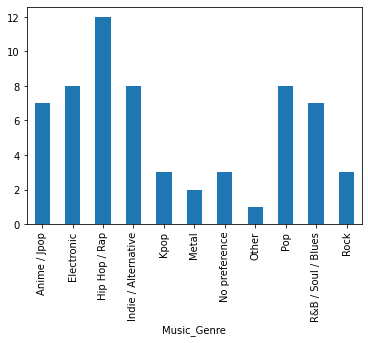

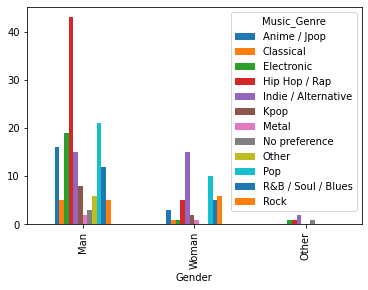

In [4]:
# nab all Reddit users
sm = df[df["Preferred_Social_Medias"].str.contains("Reddit", na=False)]
sm.reset_index()
print(sm.groupby("Music_Genre")["Age"].count().plot.bar())
#######
##Breakdown of Prefered Genre by Gender(notice Rap vs Indie )
table_4 = pd.pivot_table(data = df, values = 'Age', columns = 'Music_Genre', index = 'Gender', aggfunc = 'count' )
table_4.loc [ [ 'Man' , 'Woman', 'Other'  ] ].plot(kind = 'bar')

##Vast majority of responses contain Instagram 
tmp = df['Preferred_Social_Medias'].astype("string").str[0];

tmp.value_counts().nlargest(7)

<AxesSubplot: xlabel='Music_Genre'>

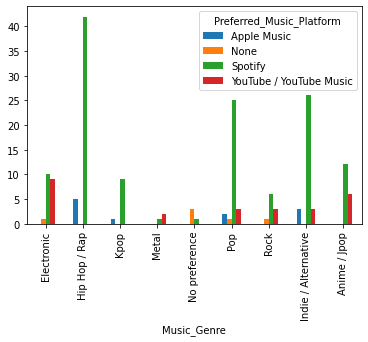

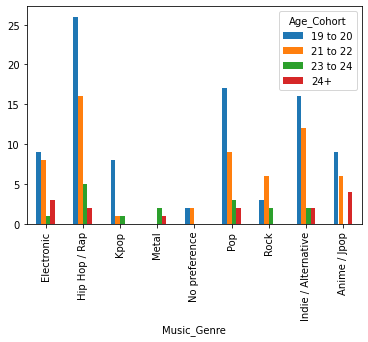

In [5]:
##Getting rid of redundant platforms, less than 5 people chose the omitted platforms 
df2=df.query("Preferred_Music_Platform != ('Amazon Prime Music', 'Soundcloud', 'Pandora')")
##Music Platform vs Genre, probably nothing here 
table_5 = pd.pivot_table(data = df2, values = 'Age', columns = 'Preferred_Music_Platform', index = 'Music_Genre', aggfunc = 'count' )
table_5.loc [ [ 'Electronic' , 'Hip Hop / Rap' , 'Kpop' , 'Metal', 'No preference', 'Pop' , 'Rock', 'Indie / Alternative', 'Anime / Jpop',    ] ].plot(kind = 'bar')
##Age vs Genre preferrence 
table_6 = pd.pivot_table(data = df, values = 'Age', columns = 'Age_Cohort', index = 'Music_Genre', aggfunc = 'count' )
table_6.loc [ [ 'Electronic' , 'Hip Hop / Rap' , 'Kpop' , 'Metal', 'No preference', 'Pop' , 'Rock', 'Indie / Alternative', 'Anime / Jpop',    ] ].plot(kind = 'bar')

**ANALYSIS OF AGE AND HOURS SPENT LISTENING TO MUSIC**<br>

**Below is a chart which pairs age with hours spent listening to music. At a glance, it seems to demonstrate a negative correlation between the two variables. Notice that the oldest cohort does not report listening to more than 8 hours of music per day. It seems that the older a respondant is, the lower their daily music consumption will be.**

<AxesSubplot: xlabel='Hours_Cohort'>

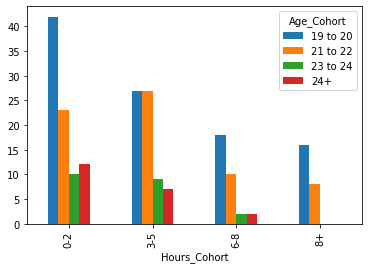

In [6]:
##Hours vs age cohort, there is a slight negative correlation between Age and Hours
table_7 = pd.pivot_table(data = df, values = 'Age', columns = 'Age_Cohort', index = 'Hours_Cohort', aggfunc = 'count' )
table_7.plot(kind = 'bar')

**ANALYSIS OF AGE AND HOURS SPENT LISTENING TO MUSIC**<br>

**We can show the raw numbers better in a pivot table hilighting the two varibles. It seems here as well that the older repondants reported less music consumption per day. We concede that the number of older repondants is dwarfed by the younger cohorts. In the following cells, we take the joint probability and visualize it on a heat map to gain further insight.**

In [7]:
Hours_Age_counts = df.pivot_table(
    index="Age_Cohort", columns="Hours_Cohort",
    values="Age",  # We can pretty much count any column, as long as there are no NaNs.
    aggfunc="count", # The count function will count the number of non-null values.
    fill_value=0
    
)
Hours_Age_counts

Hours_Cohort,0-2,3-5,6-8,8+
Age_Cohort,,,,
19 to 20,42,27,18,16
21 to 22,23,27,10,8
23 to 24,10,9,2,0
24+,12,7,2,0


In [8]:
print(Hours_Age_counts.sum().sum())
joint = Hours_Age_counts / Hours_Age_counts.sum().sum()
joint

213


Hours_Cohort,0-2,3-5,6-8,8+
Age_Cohort,,,,
19 to 20,0.197183,0.126761,0.084507,0.075117
21 to 22,0.107981,0.126761,0.046948,0.037559
23 to 24,0.046948,0.042254,0.009390,0.000000
24+,0.056338,0.032864,0.009390,0.000000


In [9]:
joint.sum(axis=1)

Age_Cohort
19 to 20    0.483568
21 to 22    0.319249
23 to 24    0.098592
24+         0.098592
dtype: float64

In [10]:
joint.sum(axis=0)

Hours_Cohort
0-2    0.408451
3-5    0.328638
6-8    0.150235
8+     0.112676
dtype: float64

In [11]:
pd.crosstab(df.Age_Cohort, df.Hours_Cohort,
            normalize=True, margins=True)

Hours_Cohort,0-2,3-5,6-8,8+,All
Age_Cohort,,,,,
19 to 20,0.197183,0.126761,0.084507,0.075117,0.483568
21 to 22,0.107981,0.126761,0.046948,0.037559,0.319249
23 to 24,0.046948,0.042254,0.009390,0.000000,0.098592
24+,0.056338,0.032864,0.009390,0.000000,0.098592
All,0.408451,0.328638,0.150235,0.112676,1.000000


**ANALYSIS OF AGE AND HOURS SPENT LISTENING TO MUSIC**<br>

**Below we have a heat map of the joint probability. Note that given a random survey respondant, they are most likely a 19-20 year old who listens to 0-2 hours of music per day. That is to say, they are the largest subgroup of respondants shown on the heat map. Generally, it seems that you have a very low probability of being in the older cohort and listening to alot of music.**

<AxesSubplot: xlabel='Hours_Cohort', ylabel='Age_Cohort'>

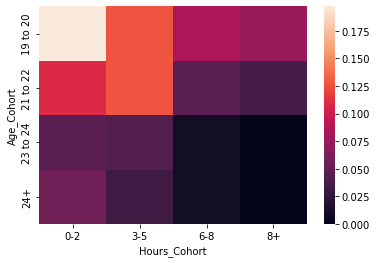

In [12]:
import seaborn as sns

sns.heatmap(joint)

**ANALYSIS OF AGE AND HOURS SPENT LISTENING TO MUSIC**<br>

**Here we examine the conditional probability between the hours and age cohorts. We calculate the probability of one variable given the other and represent that data with a stacked bar graph.**

In [13]:
Hours_counts = Hours_Age_counts.sum(axis=1)
Hours_Given_Age = Hours_Age_counts.divide(Hours_counts, axis=0)
Hours_Given_Age

Hours_Cohort,0-2,3-5,6-8,8+
Age_Cohort,,,,
19 to 20,0.407767,0.262136,0.174757,0.155340
21 to 22,0.338235,0.397059,0.147059,0.117647
23 to 24,0.476190,0.428571,0.095238,0.000000
24+,0.571429,0.333333,0.095238,0.000000


**ANALYSIS OF AGE AND HOURS SPENT LISTENING TO MUSIC**<br>

**Here it seems abundantly clear that older respondants spend less time listening to music. There is a zero percent chance that a person 23+ is listening to more than 8 hours of music. We also see that the older cohorts are more likley to report the lowest number of hours listening to music.**

<AxesSubplot: xlabel='Age_Cohort'>

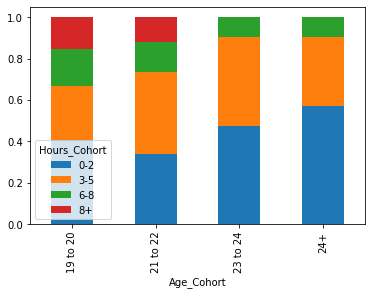

In [14]:
Hours_Given_Age.plot.bar(stacked=True)

**ANALYSIS OF AGE AND HOURS SPENT LISTENING TO MUSIC**<br>

**Our initial exploration of the data seems to indicate that these two variables are related. Our hypothesis is that music consumption is negativley correlated with the age of the survey respondant. We will test this hypotheis using the pearson correlation test and the chi-squared test.**

In [15]:
# calculate the pearson's correlation between Age and Music Consumption
df.Daily_Music_Consumption.corr(df.Age, method = 'pearson')

-0.14501744349977735

**ANALYSIS OF AGE AND HOURS SPENT LISTENING TO MUSIC**<br>

**The pearson correlation coefficient (r) is about -0.145, indicating a weak negative correlation between age and music consumption. This does not look brilliant for our hypothesis but a weak corelation is still indicated. The chi squared test will indicate if our findings are statistically relevant.**

In [16]:
Hours_Age_counts

Hours_Cohort,0-2,3-5,6-8,8+
Age_Cohort,,,,
19 to 20,42,27,18,16
21 to 22,23,27,10,8
23 to 24,10,9,2,0
24+,12,7,2,0


**ANALYSIS OF AGE AND HOURS SPENT LISTENING TO MUSIC**<br>

**Our null hypothesis is that Age and Music Consumption are independent. With 4 rows and 4 columns in our dataset, we have that (R-1)(C-1) = 9 degrees of freedom. We have a p vlue of 0.1585 meaning that this chi squared value would occurr by chance about 15% of the time. Convention states that we should use a significance level of 0.05 to determine the critical value. With 9 degrees of freedom, our critical value is 16.919. Since our chi squared value is 13.09, and less than the critical value, we cannot reject the null hypothesis. Based on this test, these two variables are independent.**

In [17]:
from scipy.stats import chi2_contingency
chi, p, dfree, expected = chi2_contingency(Hours_Age_counts)
print("calculated chi square value: " ,chi)
print("calculated p value: " ,p)
print("degree of freedom: ", dfree)
##So We need an alpha value of 0.1585 to reject the null hypothesis. Since convention seems to indicate that
#an alpha of 0.05 should be used, We cannot reject the null hypothesis, meaning that the variables are independent. 

calculated chi square value:  13.090384443867936
calculated p value:  0.15855893286220168
degree of freedom:  9


C:\Users\micha\AppData\Local\Temp\ipykernel_21336\426156125.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  r=df.corr()


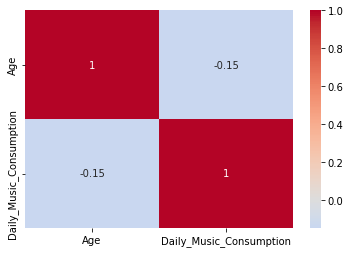

In [18]:
##Heat map
r=df.corr()
r

sns.heatmap(r, center= 0, cmap = "coolwarm",annot= True)
plt.show()

In [19]:
Medias_Genre_counts = df.pivot_table(
    index="Preferred_Social_Medias", columns="Music_Genre",
    values="Age",  # We can pretty much count any column, as long as there are no NaNs.
    aggfunc="count" # The count function will count the number of non-null values.
)
Medias_Genre_counts

Music_Genre,Anime / Jpop,Classical,Electronic,Hip Hop / Rap,Indie / Alternative,Kpop,Metal,No preference,Other,Pop,R&B / Soul / Blues,Rock
Preferred_Social_Medias,,,,,,,,,,,,
BiliBili,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
"Facebook, Instagram",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
"Facebook, Instagram, Youtube",NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Facebook, Reddit, TikTok",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
"Facebook, Youtube",NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Instagram,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
"Instagram, Reddit",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
"Instagram, Reddit, Snapchat",1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
"Instagram, Reddit, TikTok",NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN


In [20]:
counts = pd.crosstab(df.Preferred_Social_Medias, df.Music_Genre)
counts
#print(counts.sum().sum())
#joint = counts / counts.sum().sum()
#joint

Music_Genre,Anime / Jpop,Classical,Electronic,Hip Hop / Rap,Indie / Alternative,Kpop,Metal,No preference,Other,Pop,R&B / Soul / Blues,Rock
Preferred_Social_Medias,,,,,,,,,,,,
BiliBili,0,0,0,0,0,0,0,0,0,0,1,0
"Facebook, Instagram",0,0,0,0,0,0,0,0,0,0,1,0
"Facebook, Instagram, Youtube",0,0,1,0,0,0,0,0,0,0,0,0
"Facebook, Reddit, TikTok",0,0,0,0,0,0,0,0,0,0,0,1
"Facebook, Youtube",0,1,0,0,0,0,0,0,0,0,0,0
Instagram,1,2,1,1,0,0,0,0,0,2,1,0
"Instagram, Reddit",0,0,0,1,0,0,0,0,0,0,1,0
"Instagram, Reddit, Snapchat",1,0,0,2,0,0,0,0,0,0,0,1
"Instagram, Reddit, TikTok",0,0,0,2,0,1,0,0,0,1,0,0


In [21]:
print(counts.sum().sum())
joint = counts / counts.sum().sum()
joint

206


Music_Genre,Anime / Jpop,Classical,Electronic,Hip Hop / Rap,Indie / Alternative,Kpop,Metal,No preference,Other,Pop,R&B / Soul / Blues,Rock
Preferred_Social_Medias,,,,,,,,,,,,
BiliBili,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004854,0.000000
"Facebook, Instagram",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004854,0.000000
"Facebook, Instagram, Youtube",0.000000,0.000000,0.004854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Facebook, Reddit, TikTok",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004854
"Facebook, Youtube",0.000000,0.004854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Instagram,0.004854,0.009709,0.004854,0.004854,0.000000,0.000000,0.000000,0.000000,0.000000,0.009709,0.004854,0.000000
"Instagram, Reddit",0.000000,0.000000,0.000000,0.004854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004854,0.000000
"Instagram, Reddit, Snapchat",0.004854,0.000000,0.000000,0.009709,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004854
"Instagram, Reddit, TikTok",0.000000,0.000000,0.000000,0.009709,0.000000,0.004854,0.000000,0.000000,0.000000,0.004854,0.000000,0.000000


**Correalation between Music-Listening Occasions and Preferred Streaming Platform**

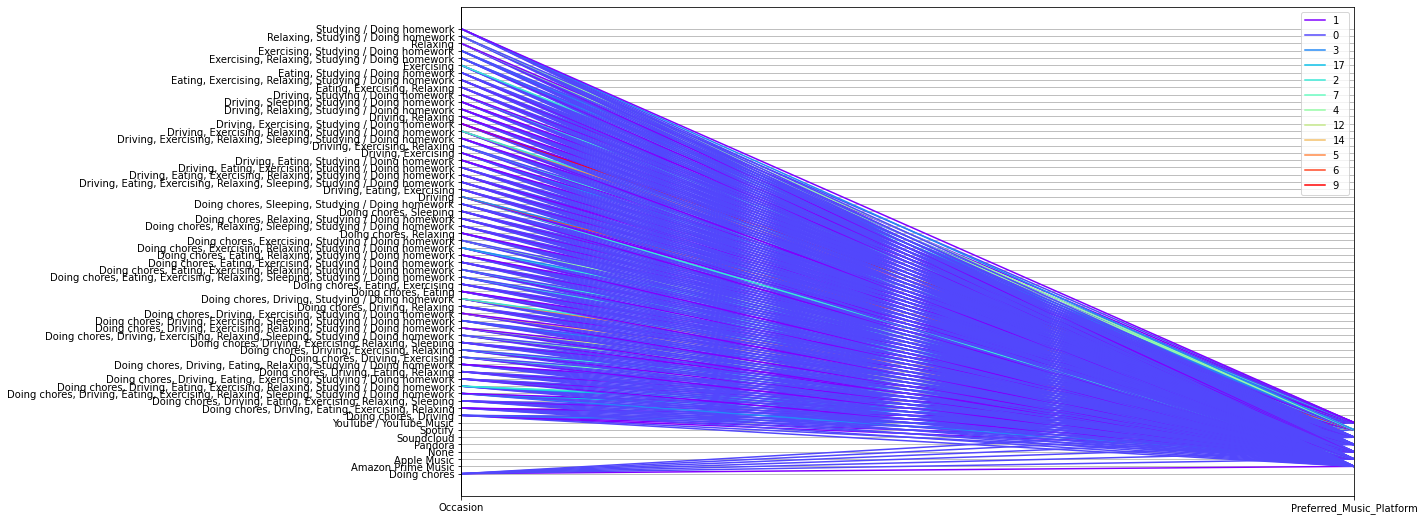

In [22]:
occasion_platform = pd.crosstab(df.Occasion, df.Preferred_Music_Platform)
new_df = occasion_platform.stack().reset_index()
new_df = new_df.rename(columns = {0: 'Count'})

plt.figure(figsize=(16, 9))
pd.plotting.parallel_coordinates(new_df, 'Count', colormap='rainbow')
plt.show()

Parallel coordinate plot showing relationship between occasions that people listen to music to preferred music platform based on frequency. The majority of the plot makes up a single color representing 0 frequency. This suggests that there is little to no correlation between the two, which means that occasions and preferred music platform are independent.

**Correalation between Music-Listening Occasions and Listening Frequency**

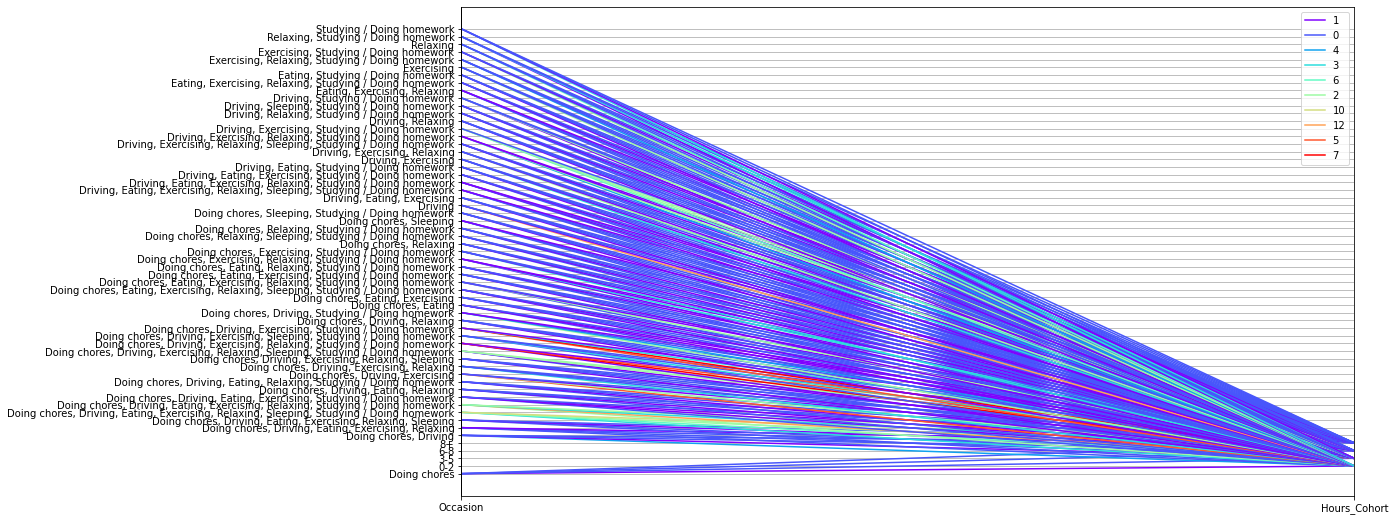

In [23]:
occasion_platform = pd.crosstab(df.Occasion, df.Hours_Cohort)
new_df = occasion_platform.stack().reset_index()
new_df = new_df.rename(columns = {0: 'Count'})

plt.figure(figsize=(16, 9))
pd.plotting.parallel_coordinates(new_df, 'Count', colormap='rainbow')
plt.show()

Parallel coordinate plot showing relationship between occasions that people listen to music to how long they listen for based on frequency. The plot is displaying more than no frequency.

**The relationship between Music-Listening Frequency and Occasions**

<function matplotlib.pyplot.show(close=None, block=None)>

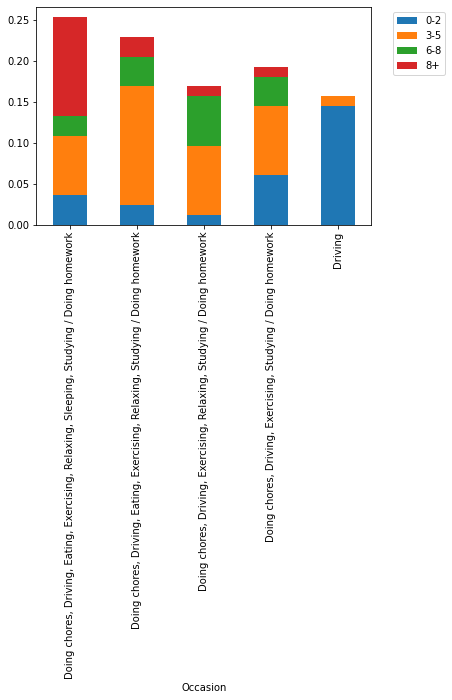

In [24]:
counts = df['Occasion'].value_counts()
filtered_counts = counts[counts > 10]
fil_df = df[df['Occasion'].isin(filtered_counts.index)]
fil_df

plot_tab = pd.crosstab(fil_df.Hours_Cohort, df.Occasion, normalize = True).T
plot = plot_tab.plot.bar(stacked = True)
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show

This plot shows that the majority of those that listen to music for about 2 hours, tend to do so only while driving. And those that listen for more than 8 hours per day appear to do so whenever they can.

**Chi-Square Analysis on Music-Listening Frequency and Occasions**

In [25]:
chi2, pval, dof, exp = chi2_contingency(plot_tab)
print('Chi-square test statistic:', chi2)
print('P-value:', pval)

Chi-square test statistic: 0.6597014493896645
P-value: 0.9999986505635238


Perform the chi-squared test on the normalized count data between occasions and hours cohort shows that it can be said, with 99% confidence, that there is no correlation between the occasion that people listen to music to in, and how many hours they listen every day.

In [26]:
df = pd.read_csv("CS105 W23 Survey Responses - Form Responses 1.csv")
df2 = df[['1. How old are you?',
          '2. To which gender identity do you most identify?',
          '62. On average, how many hours do you listen to music per day?', 
          '68. Which social media platforms do you use most often?', 
          '69. What is your favorite genre of music?', 
          '70. In which of the following situations do you listen to music?', 
          '71. Which music streaming service do you use the most?']]
df2 = df2.rename(columns={'1. How old are you?': 'Age', 
                          '2. To which gender identity do you most identify?': 'Gender', 
                          '62. On average, how many hours do you listen to music per day?': 'Daily_Music_Consumption', 
                          '68. Which social media platforms do you use most often?': 'Preferred_Social_Media_Platform', 
                          '69. What is your favorite genre of music?': 'Music_Genre', 
                          '70. In which of the following situations do you listen to music?': 'Occasion', 
                          '71. Which music streaming service do you use the most?': 'Preferred_Music_Platform'})








**ANALYSIS OF SOCIAL MEDIA AND MUSIC GENRE**<br>

**We begin by binning the age values to have a distrubution with less spread. We use a bar chart to display the distribution of age groups.**

<AxesSubplot: xlabel='Age'>

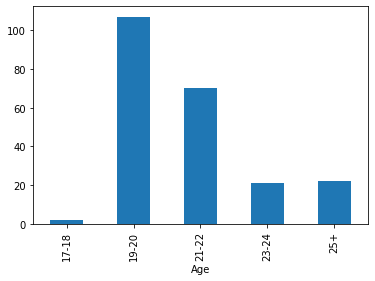

In [27]:
df2.loc[df2['Age'] > 24, 'Age'] = 25
df2["Age"] = df2["Age"].astype(str)
df2.loc[df2['Age'] == "17", 'Age'] = '17-18'
df2.loc[df2['Age'] == "18", 'Age'] = '17-18'
df2.loc[df2['Age'] == "19", 'Age'] = '19-20'
df2.loc[df2['Age'] == "20", 'Age'] = '19-20'
df2.loc[df2['Age'] == "21", 'Age'] = '21-22'
df2.loc[df2['Age'] == "22", 'Age'] = '21-22'
df2.loc[df2['Age'] == "23", 'Age'] = '23-24'
df2.loc[df2['Age'] == "24", 'Age'] = '23-24'
df2.loc[df2['Age'] == "25", 'Age'] = '25+'
display(df2.groupby("Age")["Gender"].count().plot.bar())

**ANALYSIS OF SOCIAL MEDIA AND MUSIC GENRE**<br>

**Below is a chart that shows the number of Instagram users who listen to a certain music genre. The bar chart shows that hip hop / rap is the most popular music genre. The second most popular genres are indie / alternative and pop.**

<AxesSubplot: xlabel='Music_Genre'>

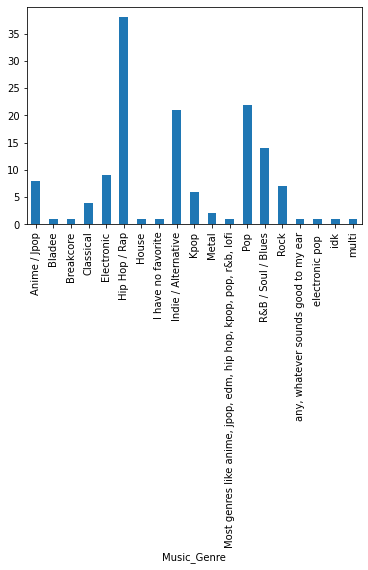

In [28]:
df3 = df2[df2["Preferred_Social_Media_Platform"].str.contains("Instagram", na = False)]
df3 = df3.reset_index()

display(df3.groupby("Music_Genre")["Age"].count().plot.bar())

**ANALYSIS OF SOCIAL MEDIA AND MUSIC GENRE**<br>

**Below is a chart that shows the number of Reddit users who listen to a certain music genre. The bar chart shows that hip hop / rap is the most popular music genre. The second most popular genres are indie / alternative and electronic. The third most popular are anime / jpop, pop, and R&B / soul / blues.**

<AxesSubplot: xlabel='Music_Genre'>

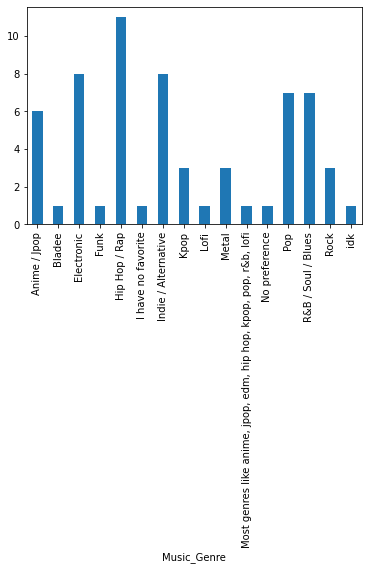

In [29]:
df3 = df2[df2["Preferred_Social_Media_Platform"].str.contains("Reddit", na = False)]
df3 = df3.reset_index()

display(df3.groupby("Music_Genre")["Age"].count().plot.bar())

**ANALYSIS OF SOCIAL MEDIA AND MUSIC GENRE**<br>

**Below is a chart that shows the number of Snapchat users who listen to a certain music genre. The bar chart shows that hip hop / rap is the most popular music genre. The second most popular genre is pop, and it is far less popular than rap.**

<AxesSubplot: xlabel='Music_Genre'>

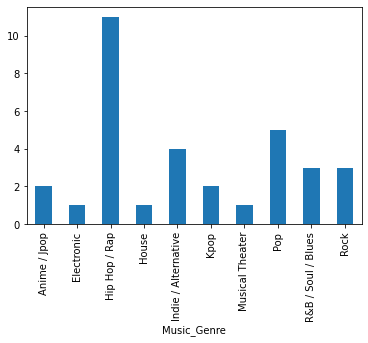

In [30]:
df3 = df2[df2["Preferred_Social_Media_Platform"].str.contains("Snapchat", na = False)]
df3 = df3.reset_index()

display(df3.groupby("Music_Genre")["Age"].count().plot.bar())

**ANALYSIS OF SOCIAL MEDIA AND MUSIC GENRE**<br>

**Below is a chart that shows the number of TikTok users who listen to a certain music genre. The bar chart shows that hip hop / rap is the most popular music genre. The second most popular genres are indie / alternative.**

<AxesSubplot: xlabel='Music_Genre'>

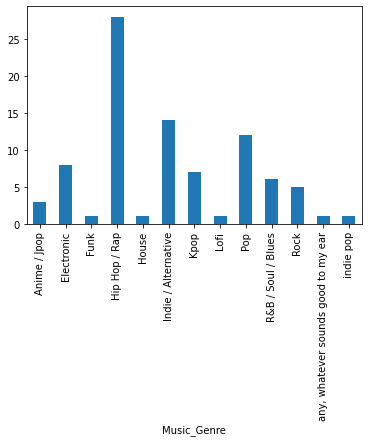

In [31]:
df3 = df2[df2["Preferred_Social_Media_Platform"].str.contains("TikTok", na = False)]
df3 = df3.reset_index()

display(df3.groupby("Music_Genre")["Age"].count().plot.bar())

**ANALYSIS OF SOCIAL MEDIA AND MUSIC GENRE**<br>

**Below is a chart that shows the number of Twitter users who listen to a certain music genre. The bar chart shows that hip hop / rap is the most popular music genre. The second most popular genres are indie / alternative.**

<AxesSubplot: xlabel='Music_Genre'>

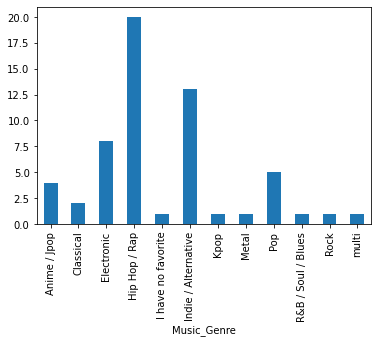

In [32]:
df3 = df2[df2["Preferred_Social_Media_Platform"].str.contains("Twitter", na = False)]
df3 = df3.reset_index()

display(df3.groupby("Music_Genre")["Age"].count().plot.bar())

**ANALYSIS OF SOCIAL MEDIA AND MUSIC GENRE**<br>

**Below is a chart that shows the number of Youtube users who listen to a certain music genre. The bar chart shows that pop is the most popular genre, which is a change from the previous social media platforms. Hip hop / rap is the second most popular music genre followed closely by indie / alternative, electronic, and anime / jpop.**

<AxesSubplot: xlabel='Music_Genre'>

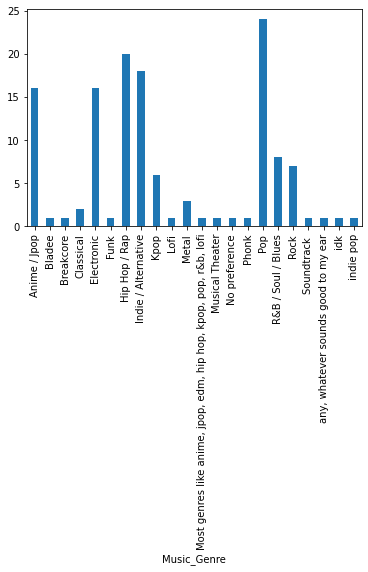

In [33]:
df3 = df2[df2["Preferred_Social_Media_Platform"].str.contains("Youtube", na = False)]
df3 = df3.reset_index()

display(df3.groupby("Music_Genre")["Age"].count().plot.bar())

**ANALYSIS OF SOCIAL MEDIA AND MUSIC GENRE**<br>

**Below is a the cross tabulation of age and social media platform to see if there are any patterns.**

In [34]:
df2["Preferred_Social_Media_Platform"] = df2["Preferred_Social_Media_Platform"].fillna("NAN")
mediaPlatforms = df2["Preferred_Social_Media_Platform"].unique()
AvsSM = pd.crosstab(df2.Age, df2.Preferred_Social_Media_Platform)
AvsSM

Preferred_Social_Media_Platform,BiliBili,"Facebook, Instagram","Facebook, Instagram, Youtube","Facebook, Reddit, TikTok","Facebook, Youtube",Instagram,"Instagram, Reddit","Instagram, Reddit, Snapchat","Instagram, Reddit, TikTok","Instagram, Reddit, Twitter",...,"Snapchat, Youtube",TikTok,"TikTok, Twitter","TikTok, Twitter, Youtube","TikTok, Youtube","TikTok, Youtube, Twitch",Twitter,"Twitter, Youtube",Youtube,"Youtube, Discord"
Age,,,,,,,,,,,,,,,,,,,,,
17-18,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19-20,0,0,0,0,0,5,1,0,3,2,...,1,2,1,2,4,1,0,2,5,0
21-22,0,1,1,1,0,2,1,2,1,2,...,1,0,1,2,2,0,0,2,0,0
23-24,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,2,1
25+,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,1,5,0


In [35]:
a = []
b = []
c = []
d = []
e = []
f = []
g = []
for x in mediaPlatforms:
    if "Facebook" in x:
        a.append(x)
    if "Instagram" in x:
        b.append(x)
    if "Reddit" in x:
        c.append(x)
    if "Snapchat" in x:
        d.append(x)
    if "TikTok" in x:
        e.append(x)
    if "Twitter" in x:
        f.append(x)
    if "Youtube" in x:
        g.append(x)
AvsSM["sumFB"] = AvsSM[a].sum(axis = 1)
AvsSM["sumInsta"] = AvsSM[b].sum(axis = 1)
AvsSM["sumRed"] = AvsSM[c].sum(axis = 1)
AvsSM["sumSnap"] = AvsSM[d].sum(axis = 1)
AvsSM["sumTik"] = AvsSM[e].sum(axis = 1)
AvsSM["sumTwitter"] = AvsSM[f].sum(axis = 1)
AvsSM["sumYT"] = AvsSM[g].sum(axis = 1)
AvsSM = AvsSM[['sumFB','sumInsta','sumRed','sumSnap','sumTik','sumTwitter','sumYT']]
AvsSM = AvsSM.rename(columns={'sumFB':'Facebook','sumInsta':'Instagram','sumRed':'Reddit','sumSnap':'Snapchat', 
                              'sumTik':'Tiktok','sumTwitter':'Twitter','sumYT':'Youtube'})
AvsSM

Preferred_Social_Media_Platform,Facebook,Instagram,Reddit,Snapchat,Tiktok,Twitter,Youtube
Age,,,,,,,
17-18,0,2,0,0,1,0,0
19-20,0,71,30,21,51,27,63
21-22,3,47,23,8,30,23,39
23-24,0,14,6,4,6,4,16
25+,1,8,6,1,1,6,15


**ANALYSIS OF SOCIAL MEDIA AND MUSIC GENRE**<br>

**Below is a heat map of the distribution between social media platform and age group. It shows that instagram users of age 19-20 are the most abundant and youtube users of age 19-20 are the second most abundant. So, the findings between social media and music genre are heavily dependent on the answer choices of these two groups. As we saw, instagram users love hip hop the most and youtube users like pop the most followed closely by hip hop.**

<AxesSubplot: xlabel='Preferred_Social_Media_Platform', ylabel='Age'>

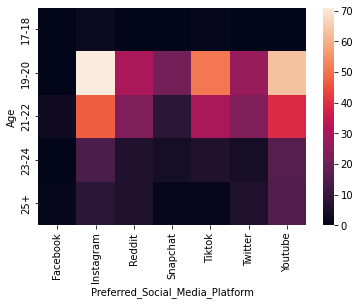

In [36]:
sns.heatmap(AvsSM)

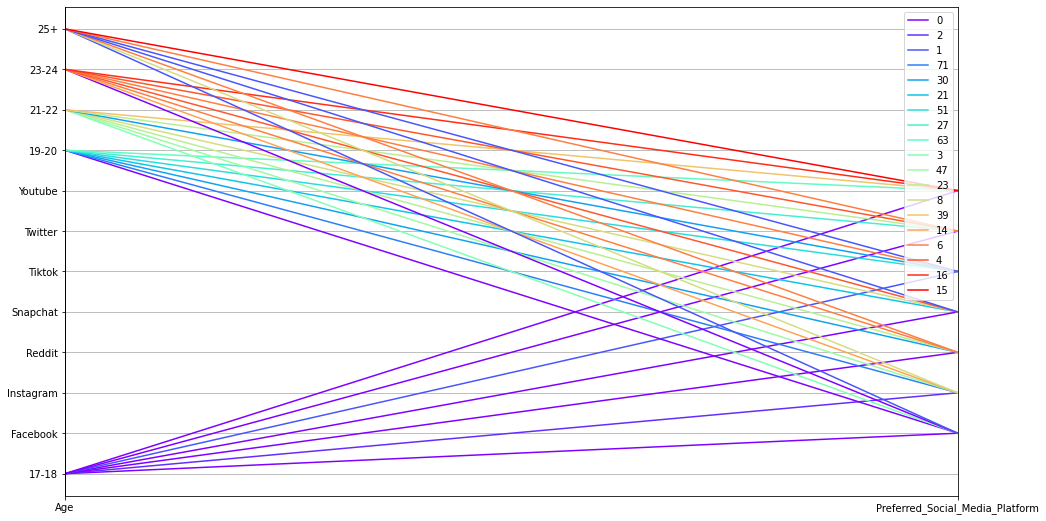

In [37]:
df3 = AvsSM.stack().reset_index()
df3 = df3.rename(columns = {0: 'Count'})

plt.figure(figsize=(16, 9))
pd.plotting.parallel_coordinates(df3, 'Count', colormap='rainbow')
plt.show()

**Chi-Square Analysis on Social media platform and age**

In [38]:
chi2, pval, dof, exp = chi2_contingency(AvsSM)
print('Chi-square test statistic:', chi2)
print('P-value:', pval)

Chi-square test statistic: 27.217066991757804
P-value: 0.29443712198770466
